In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

### MNIST

In [3]:
from sklearn import datasets

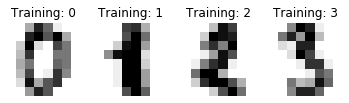

In [9]:
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
y = digits.target

#### Train-test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    data, y, test_size=0.20, random_state=42)

## CNN

In [16]:
import keras
from keras import models, layers

### Preprocess

#### Image to channel last

In [19]:
img_rows = 8
img_cols = 8

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

#### Label to categorical

In [13]:
n_categories = 10

y_train = keras.utils.to_categorical(y_train, n_categories)
y_test = keras.utils.to_categorical(y_test, n_categories)

### Model

In [21]:
##model building
model = models.Sequential()
#convolutional layer with rectified linear unit activation
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(layers.Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(layers.Flatten())
#fully connected to get all relevant data
model.add(layers.Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(layers.Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(layers.Dense(n_categories, activation='softmax'))

In [23]:
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [27]:
batch_size = 128
num_epoch = 30

#model training
model_log = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 1437 samples, validate on 360 samples
Epoch 1/30
1437/1437 [==============================] - 0s 56us/step - loss: 0.0225 - acc: 0.9923 - val_loss: 0.0281 - val_acc: 0.9889
Epoch 2/30
1437/1437 [==============================] - 0s 53us/step - loss: 0.0137 - acc: 0.9979 - val_loss: 0.0298 - val_acc: 0.9833
Epoch 3/30
1437/1437 [==============================] - 0s 54us/step - loss: 0.0298 - acc: 0.9903 - val_loss: 0.0492 - val_acc: 0.9861
Epoch 4/30
1437/1437 [==============================] - 0s 56us/step - loss: 0.0165 - acc: 0.9958 - val_loss: 0.0295 - val_acc: 0.9861
Epoch 5/30
1437/1437 [==============================] - 0s 51us/step - loss: 0.0159 - acc: 0.9958 - val_loss: 0.0226 - val_acc: 0.9944
Epoch 6/30
1437/1437 [==============================] - 0s 53us/step - loss: 0.0098 - acc: 0.9972 - val_loss: 0.0347 - val_acc: 0.9861
Epoch 7/30
1437/1437 [==============================] - 0s 54us/step - loss: 0.0149 - acc: 0.9951 - val_loss: 0.0238 - val_acc: 0.9889
Epoch 8/

In [36]:
y_test_pred_proba = model.predict(x_test)
y_test_pred = np.argmax(y_test_pred_proba, axis=1)

## Evaluation

In [28]:
from sklearn import metrics

In [41]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(np.argmax(y_test, axis=1), y_test_pred))

Confusion matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  1  0  0  0  0 39]]


In [42]:
print("Accuracy: %s" % metrics.accuracy_score(np.argmax(y_test, axis=1), y_test_pred))

Accuracy: 0.9916666666666667
